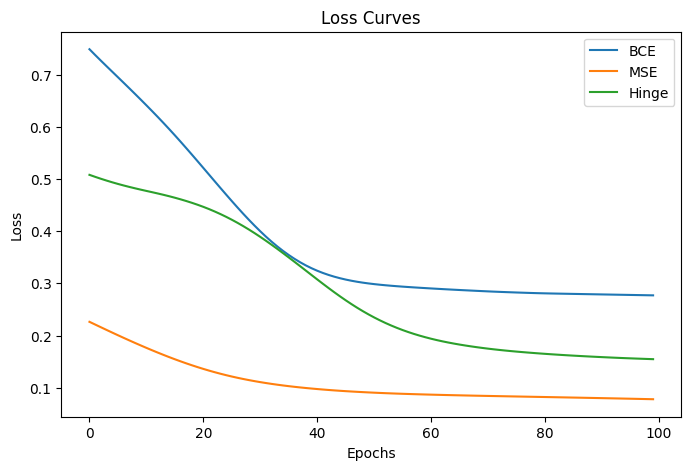

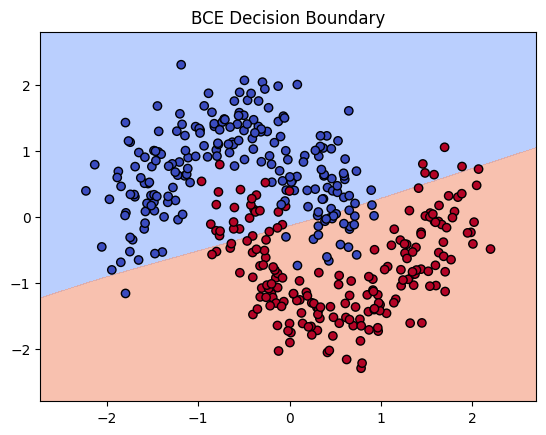

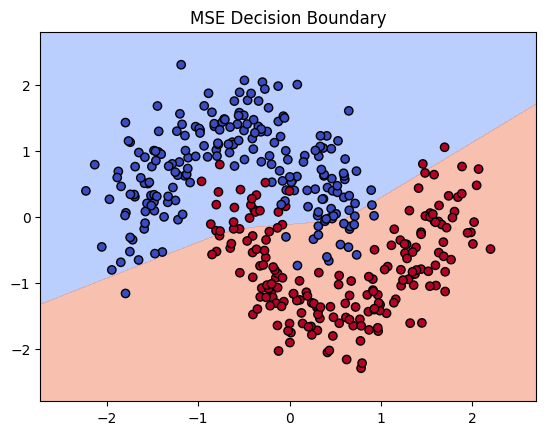

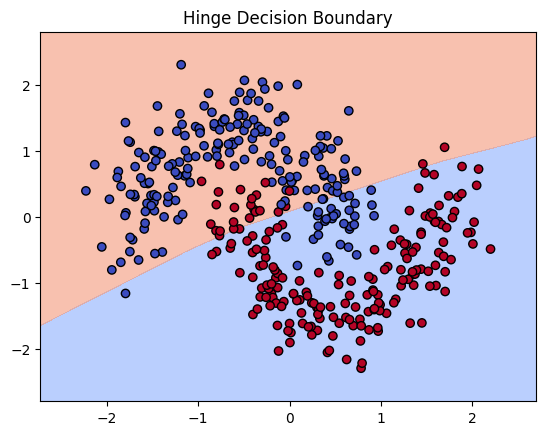

In [1]:
import sys, os
# add the repo root (parent of notebooks/) to the import path
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))

import torch
import torch.nn as nn
import torch.optim as optim
from src.data import load_data
from src.model import Net
from src.train import train_model
from src.visualize import plot_loss_curves, plot_decision_boundary

# Load data
X_train, X_test, y_train, y_test = load_data()

# Define loss functions
losses = {
    'BCE': nn.BCELoss(),
    'MSE': nn.MSELoss(),
    'Hinge': nn.HingeEmbeddingLoss()
}

# Train models for each loss
results = {}
for name, loss_fn in losses.items():
    model = Net()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    if name == 'Hinge':
        target = y_train.clone()
        target[target == 0] = -1
        model, loss_vals = train_model(model, optimizer, loss_fn, X_train, target)
    else:
        model, loss_vals = train_model(model, optimizer, loss_fn, X_train, y_train)
    results[name] = (model, loss_vals)

# Plot results
plot_loss_curves(results)
for name, (model, _) in results.items():
    plot_decision_boundary(model, X_train.numpy(), y_train.numpy(),
                           title=f'{name} Decision Boundary')
